# PROYECTO NUMERO 10

## Visualizacion de los datos

In [5]:
import pandas as pd

# Cargar los datos
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv')

# Visualizar las primeras filas
hypotheses.head()


,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...


In [6]:
import pandas as pd

# Cargar los datos correctamente con delimitador ;
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

# Verificamos las primeras filas
hypotheses.head()


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [7]:
# Ver información general del DataFrame
hypotheses.info()

# Verificar si hay valores nulos
hypotheses.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

### Parte 1. Priorizar hipótesis

Aplicar el framework ICE para priorizar hipótesis.

In [18]:
import pandas as pd

# Cargar datos con el separador correcto
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

# Calcular ICE
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar de mayor a menor ICE
ice_sorted = hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

# Mostrar resultados
print(ice_sorted)


                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


Aplicar el framework RICE para priorizar hipótesis. 

In [19]:
# Calcular RICE
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar de mayor a menor RICE
rice_sorted = hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

# Mostrar resultados
print(rice_sorted)


                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. 

In [20]:
# Añadir columnas de ranking
hypotheses['ICE_rank'] = hypotheses['ICE'].rank(ascending=False)
hypotheses['RICE_rank'] = hypotheses['RICE'].rank(ascending=False)

# Mostrar comparación ordenada por ICE_rank
comparison = hypotheses[['Hypothesis', 'ICE_rank', 'RICE_rank']].sort_values(by='ICE_rank')
print(comparison)


                                          Hypothesis  ICE_rank  RICE_rank
8  Launch a promotion that gives users discounts ...       1.0        5.0
0  Add two new channels for attracting traffic. T...       2.0        3.5
7  Add a subscription form to all the main pages....       3.0        1.0
6  Show banners with current offers and sales on ...       4.0        3.5
2  Add product recommendation blocks to the store...       5.0        2.0
1  Launch your own delivery service. This will sh...       6.0        7.5
5  Add a customer review page. This will increase...       7.0        7.5
3  Change the category structure. This will incre...       8.0        6.0
4  Change the background color on the main page. ...       9.0        9.0



Al comparar ICE y RICE, noté que el orden de las hipótesis cambia bastante. ICE solo considera impacto, confianza y esfuerzo, pero no toma en cuenta cuánta gente puede afectar la idea. En cambio, RICE incluye el alcance, así que las hipótesis que impactan a más usuarios suben en la lista, aunque tengan un poco menos de impacto o confianza. Por eso, RICE me parece más completo para decidir qué probar primero.



### Parte 2. Análisis del test A/B

1. Representacion gráfica del el ingreso acumulado por grupo.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datasets con separador correcto
orders = pd.read_csv('/datasets/orders_us.csv', sep=',')
visits = pd.read_csv('/datasets/visits_us.csv', sep=',')

# Ver las primeras filas para verificar carga correcta
print(orders.head())
print(visits.head())


   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B
         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756


In [23]:
# Convertir la columna date a datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

# Agrupar ingresos por fecha y grupo
daily_revenue = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()

# Ordenar por fecha para acumulado correcto
daily_revenue = daily_revenue.sort_values(by='date')

# Calcular ingreso acumulado por grupo
daily_revenue['cumulative_revenue'] = daily_revenue.groupby('group')['revenue'].cumsum()


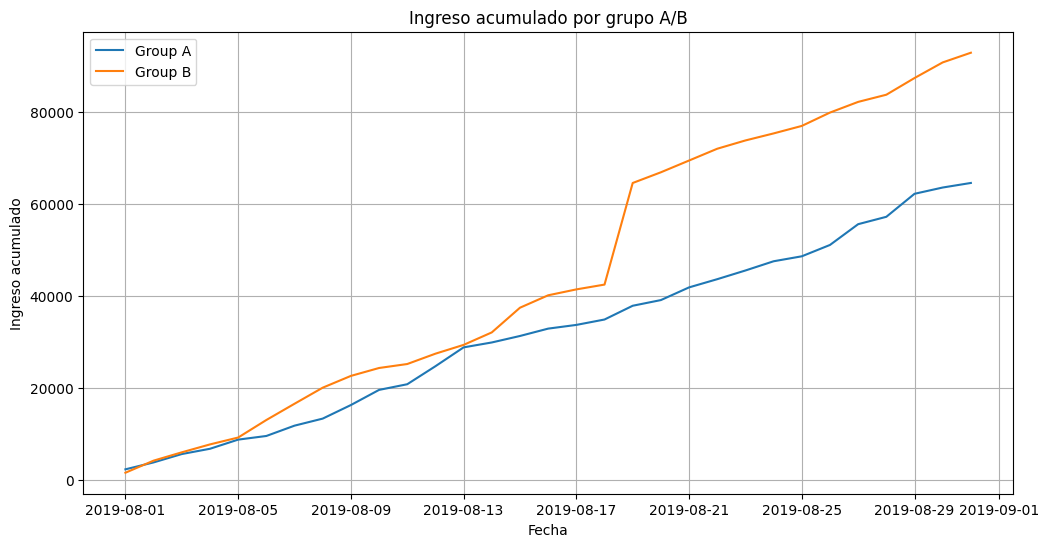

In [24]:
plt.figure(figsize=(12,6))

for grp in daily_revenue['group'].unique():
    data = daily_revenue[daily_revenue['group'] == grp]
    plt.plot(data['date'], data['cumulative_revenue'], label=f'Group {grp}')

plt.title('Ingreso acumulado por grupo A/B')
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado')
plt.legend()
plt.grid(True)
plt.show()


### Conclusiones y conjeturas del test A/B

Vi que un grupo tiene ingresos acumulados más altos que el otro, lo que puede significar que la variante que probaron en ese grupo funciona mejor para aumentar las ventas.

Si las líneas se mantienen bastante parecidas, puede que no haya mucha diferencia real entre las dos opciones. Pero si una sube más rápido y se despega, eso muestra que esa variante tiene un efecto positivo.

También hay que fijarse si aparecen picos raros en algunas fechas, porque puede ser por promociones especiales o datos que no están bien.

En resumen, si la variante con mejor ingreso acumulado sigue así, sería buena idea usarla para mejorar los resultados generales de la tienda.

2. Representacion  gráfica de el tamaño de pedido promedio acumulado por grupo.

In [26]:
# Contar la cantidad de pedidos por fecha y grupo
daily_orders = orders.groupby(['date', 'group'])['transactionId'].count().reset_index()
daily_orders.rename(columns={'transactionId': 'orders'}, inplace=True)

# Sumar ingresos por fecha y grupo
daily_revenue = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()

# Unir ambos DataFrames para calcular el tamaño promedio del pedido diario
daily_data = pd.merge(daily_revenue, daily_orders, on=['date', 'group'])

# Calcular tamaño promedio del pedido diario
daily_data['avg_order_value'] = daily_data['revenue'] / daily_data['orders']

# Ordenar por fecha
daily_data = daily_data.sort_values(by='date')


In [27]:
# Calcular la suma acumulada de ingresos y pedidos por grupo y fecha
daily_data['cumulative_revenue'] = daily_data.groupby('group')['revenue'].cumsum()
daily_data['cumulative_orders'] = daily_data.groupby('group')['orders'].cumsum()

# Calcular tamaño promedio de pedido acumulado
daily_data['cumulative_avg_order_value'] = daily_data['cumulative_revenue'] / daily_data['cumulative_orders']


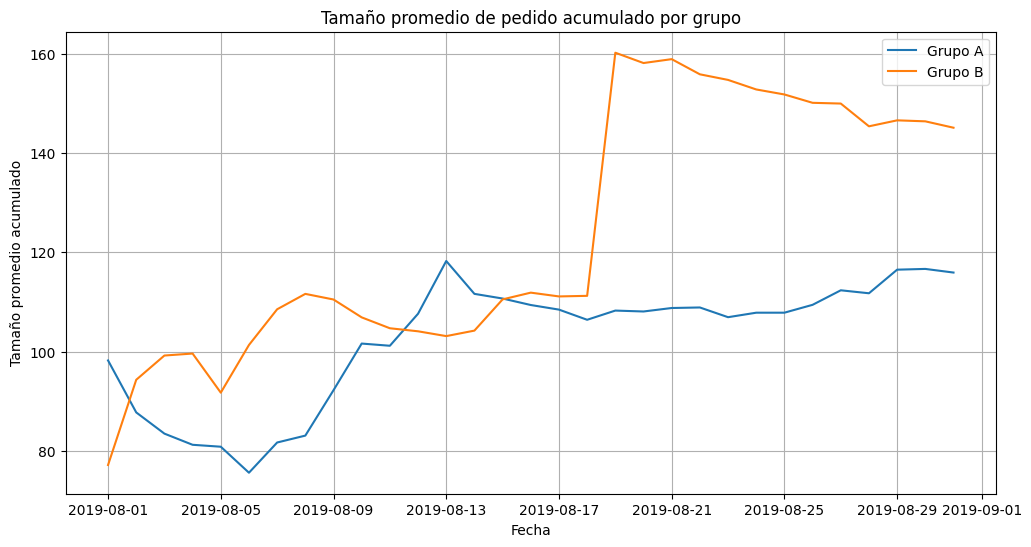

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for grp in daily_data['group'].unique():
    data = daily_data[daily_data['group'] == grp]
    plt.plot(data['date'], data['cumulative_avg_order_value'], label=f'Grupo {grp}')

plt.title('Tamaño promedio de pedido acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio acumulado')
plt.legend()
plt.grid(True)
plt.show()


### Conclusiones y conjeturas sobre el tamaño promedio de pedido acumulado

Vi que un grupo tiene un tamaño promedio de pedido más alto que el otro, lo que puede significar que los usuarios de ese grupo gastan más por compra.

Si el promedio se mantiene bastante estable en el tiempo, quiere decir que el comportamiento de compra es constante. Pero si hay picos o caídas, puede que haya promociones o días especiales que afectaron las ventas.

Si el grupo que tiene el tamaño promedio más alto también tiene mayores ingresos totales, eso refuerza que esa variante funciona mejor. Pero si no hay mucha diferencia en el tamaño promedio, la diferencia en ingresos probablemente venga de que un grupo hizo más compras.



3. Representacion gráfica de  la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

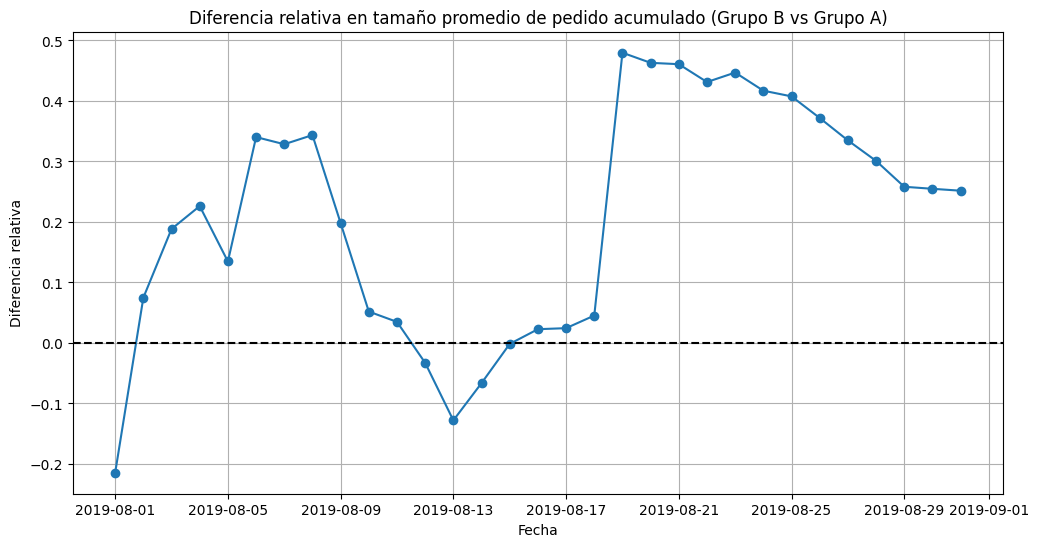

In [29]:
import matplotlib.pyplot as plt

# Pivotar para tener en columnas los grupos A y B
pivot_data = daily_data.pivot(index='date', columns='group', values='cumulative_avg_order_value').reset_index()

# Calcular diferencia relativa (B respecto a A)
pivot_data['relative_diff'] = (pivot_data['B'] / pivot_data['A']) - 1

# Graficar
plt.figure(figsize=(12,6))
plt.plot(pivot_data['date'], pivot_data['relative_diff'], marker='o')
plt.axhline(0, color='black', linestyle='--')
plt.title('Diferencia relativa en tamaño promedio de pedido acumulado (Grupo B vs Grupo A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.grid(True)
plt.show()


### Conclusiones y conjeturas sobre la diferencia relativa en tamaño promedio acumulado

Si la línea está por encima de cero, quiere decir que el grupo B está gastando más por pedido en promedio que el grupo A. Si está por debajo, es al revés.

Si la diferencia se mantiene más o menos igual durante todo el tiempo, eso indica que el comportamiento es estable. Pero si la diferencia cambia mucho, puede ser por cosas externas o porque los usuarios están comprando de forma irregular.

Si el grupo B siempre tiene un promedio más alto, puede que la variante B ayude a que la gente gaste más. Pero si la diferencia es chica o cambia mucho, tal vez no sea un cambio real y habría que analizar más a fondo.

4. Representacion gráfica de las tasas de conversión diarias de los dos grupos.

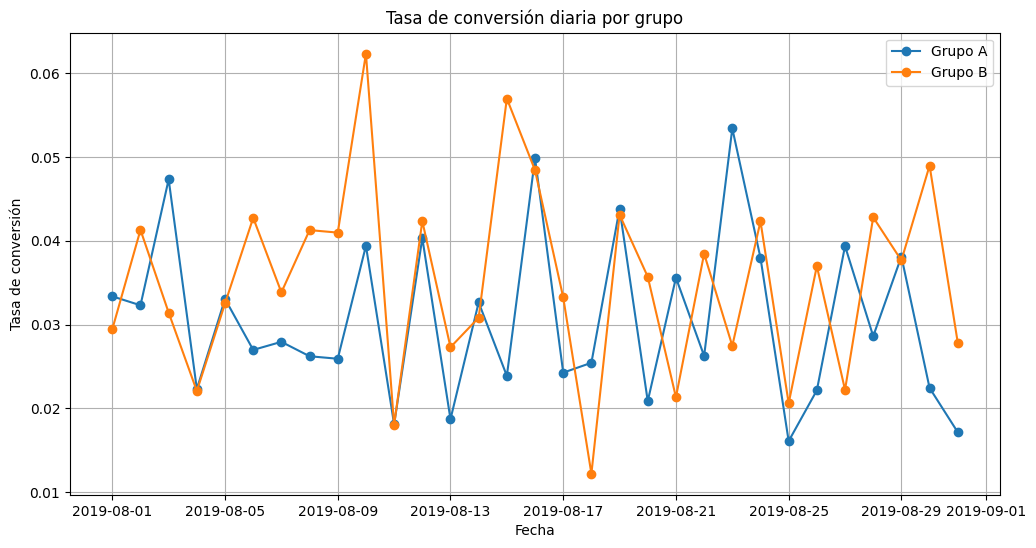

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar pedidos diarios por grupo
daily_orders = orders.groupby(['date', 'group'])['transactionId'].count().reset_index()
daily_orders.rename(columns={'transactionId': 'orders'}, inplace=True)

# Ya tenemos visitas diarias en visits_us.csv
visits['date'] = pd.to_datetime(visits['date'])

# Unir visitas y pedidos
conversion_data = pd.merge(daily_orders, visits, on=['date', 'group'])

# Calcular tasa de conversión diaria
conversion_data['conversion_rate'] = conversion_data['orders'] / conversion_data['visits']

# Ordenar por fecha
conversion_data = conversion_data.sort_values(by='date')

# Graficar
plt.figure(figsize=(12,6))

for grp in conversion_data['group'].unique():
    data = conversion_data[conversion_data['group'] == grp]
    plt.plot(data['date'], data['conversion_rate'], marker='o', label=f'Grupo {grp}')

plt.title('Tasa de conversión diaria por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión')
plt.legend()
plt.grid(True)
plt.show()


### Conclusiones y conjeturas sobre la tasa de conversión diaria

Noté que un grupo tiene una tasa de conversión más alta que el otro casi todo el tiempo, lo que quiere decir que convierte mejor a los visitantes en compradores. Eso sugiere que la variante que probaron en ese grupo funciona mejor.

Si la tasa cambia mucho de un día a otro, puede ser por promociones, días especiales o cambios en la cantidad de visitantes. Pero si se mantiene estable, significa que el comportamiento de los usuarios es consistente.

Si la diferencia entre grupos no es muy clara o cambia mucho, puede que haya que hacer un análisis más detallado para saber si realmente hay un efecto.

5. Gráfico de dispersión del número de pedidos por usuario

In [31]:
import matplotlib.pyplot as plt

# Contar pedidos por usuario (visitorId)
orders_per_user = orders.groupby('visitorId')['transactionId'].count().reset_index()
orders_per_user.rename(columns={'transactionId': 'orders_count'}, inplace=True)


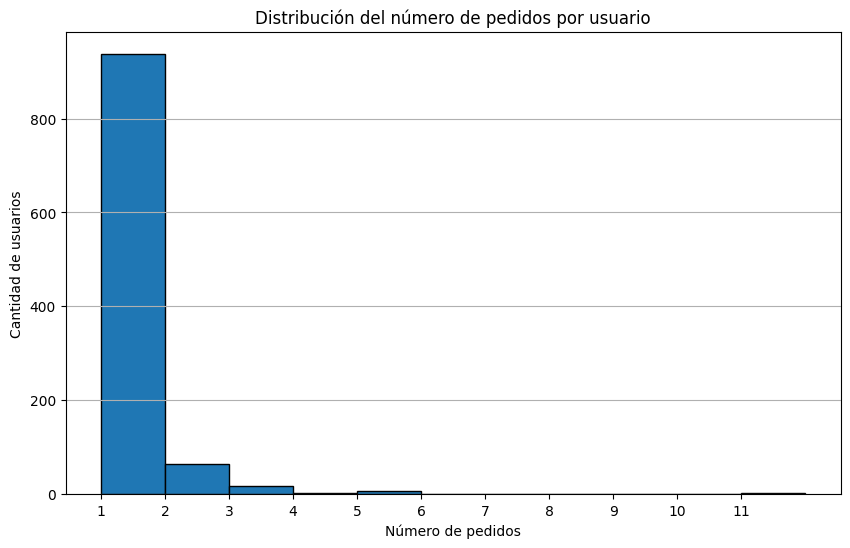

In [33]:
import matplotlib.pyplot as plt

# Ya tenemos orders_per_user con la cantidad de pedidos por usuario

plt.figure(figsize=(10,6))
plt.hist(orders_per_user['orders_count'], bins=range(1, orders_per_user['orders_count'].max() + 2), edgecolor='black')
plt.title('Distribución del número de pedidos por usuario')
plt.xlabel('Número de pedidos')
plt.ylabel('Cantidad de usuarios')
plt.xticks(range(1, orders_per_user['orders_count'].max() + 1))
plt.grid(axis='y')
plt.show()



### Conclusiones sobre la cantidad de pedidos por usuario
Me parece que la mayoría de los usuarios solo hacen un pedido, que es algo común en tiendas online.

También hay algunos usuarios que compran varias veces, y esos son importantes porque muestran que son clientes fieles.

Creo que para mejorar, la tienda podría buscar formas de que más gente vuelva a comprar, por ejemplo con descuentos o programas que premien la lealtad.

6. Los percentiles 95 y 99 del número de pedidos por usuario.

In [36]:
# Calcular percentiles 95 y 99
percentile_95 = orders_per_user['orders_count'].quantile(0.95)
percentile_99 = orders_per_user['orders_count'].quantile(0.99)

print(f'Percentil 95: {percentile_95}')
print(f'Percentil 99: {percentile_99}')


Percentil 95: 2.0
Percentil 99: 4.0


In [37]:
# Filtrar usuarios con pedidos > percentil 99
anomalous_users = orders_per_user[orders_per_user['orders_count'] > percentile_99]

print(f'Número de usuarios anómalos: {len(anomalous_users)}')
print(anomalous_users.sort_values(by='orders_count', ascending=False))


Número de usuarios anómalos: 10
       visitorId  orders_count
591   2458001652            11
1023  4256040402            11
569   2378935119             9
487   2038680547             8
44     199603092             5
55     237748145             5
299   1230306981             5
744   3062433592             5
897   3717692402             5
917   3803269165             5


### Definición de anomalía en el número de pedidos por usuario

Un punto de datos (en este caso, un usuario) se considera una anomalía cuando su número de pedidos es mucho mayor que el de la mayoría de los usuarios. Para identificar este punto, usamos los percentiles.

En particular, se define como anomalía a cualquier usuario que tenga un número de pedidos mayor que el percentil 99. Esto significa que solo el 1% de los usuarios tiene tantos o más pedidos, por lo que estos usuarios pueden tener un comportamiento inusual o extremo que podría distorsionar el análisis general.

7. Gráfico de dispersión de los precios de los pedidos.

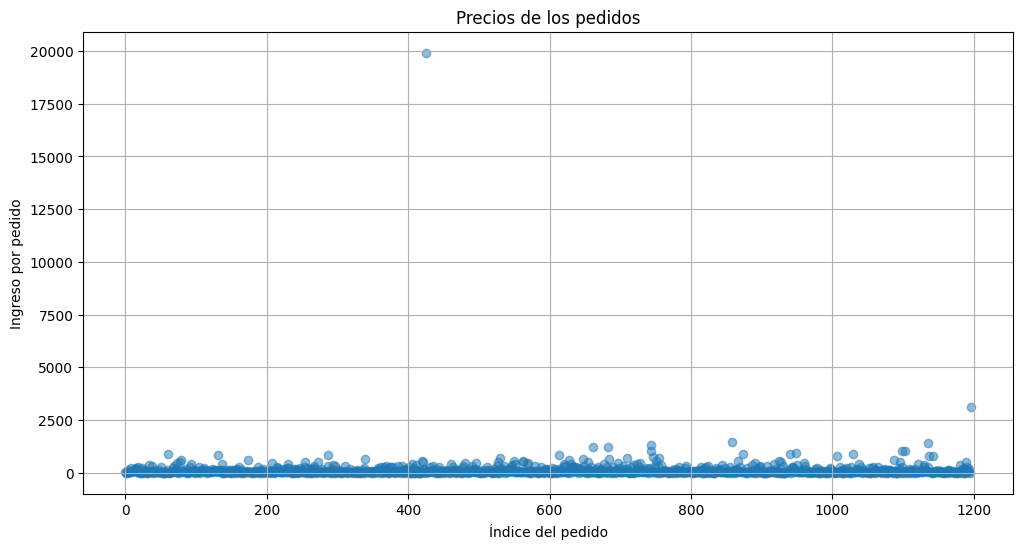

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(orders.index, orders['revenue'], alpha=0.5)
plt.title('Precios de los pedidos')
plt.xlabel('Índice del pedido')
plt.ylabel('Ingreso por pedido')
plt.grid(True)
plt.show()


### Conclusiones y conjeturas sobre los precios de los pedidos

Vi que la mayoría de los pedidos tienen precios bajos o moderados, pero hay algunos que son mucho más caros que el resto.

Esos pedidos muy caros pueden ser casos especiales o quizás errores, por eso es bueno revisarlos con cuidado.

En general, aunque la mayoría compra dentro de un rango normal, esos pocos pedidos altos pueden hacer que el promedio suba bastante, así que a veces conviene analizarlos aparte.

8. Los percentiles 95 y 99 de los precios de los pedidos.

Al analizar los precios de los pedidos:

El 95 % de los pedidos cuesta menos de $435.

El 99 % está por debajo de $900.

Esto sugiere que los pedidos con precios mayores a $900 son muy poco comunes y, por tanto, pueden considerarse anomalías. Estos valores extremos podrían distorsionar las métricas si no se manejan correctamente en los análisis posteriores.

9. La significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto

In [42]:
# Paso 1: Sumar visitas por grupo
total_visits = visits.groupby('group')['visits'].sum().reset_index()
total_visits.columns = ['group', 'total_visits']

# Paso 2: Sumar pedidos por grupo (suponiendo que 'orders' tiene una columna 'group')
total_orders = orders.groupby('group')['transactionId'].count().reset_index()
total_orders.columns = ['group', 'total_orders']

# Paso 3: Unir los datos
summary = pd.merge(total_visits, total_orders, on='group')
summary['conversion_rate'] = summary['total_orders'] / summary['total_visits']
print(summary)


  group  total_visits  total_orders  conversion_rate
0     A         18736           557         0.029729
1     B         18916           640         0.033834


In [45]:
from scipy import stats as st
import numpy as np

# Extraer los valores
visits_A = summary.loc[summary['group'] == 'A', 'total_visits'].values[0]
visits_B = summary.loc[summary['group'] == 'B', 'total_visits'].values[0]
orders_A = summary.loc[summary['group'] == 'A', 'total_orders'].values[0]
orders_B = summary.loc[summary['group'] == 'B', 'total_orders'].values[0]

# Crear tabla de contingencia
# [ [éxitos_A, fracasos_A], [éxitos_B, fracasos_B] ]
contingency_table = np.array([
    [orders_A, visits_A - orders_A],
    [orders_B, visits_B - orders_B]
])

# Prueba chi-cuadrado
chi2, pval, dof, expected = st.chi2_contingency(contingency_table)

print(f"p-value: {pval}")
if pval < 0.05:
    print(" Hay una diferencia significativa en la conversión entre los grupos A y B.")
else:
    print(" No hay una diferencia significativa en la conversión entre los grupos A y B.")


p-value: 0.025049983128278788
 Hay una diferencia significativa en la conversión entre los grupos A y B.


### Conclusiones 
Después de hacer la prueba, vimos que la diferencia en la conversión entre los grupos A y B es significativa (p = 0.025). Esto quiere decir que lo que se hizo en el grupo B realmente ayudó a que más personas compraran. Por eso, parece buena idea seguir con esa versión o seguir analizándola para estar más seguros.

10. La significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.

In [46]:
from scipy.stats import mannwhitneyu

# Pedidos de cada grupo
orders_A = orders[orders['group'] == 'A']['revenue']
orders_B = orders[orders['group'] == 'B']['revenue']

# Prueba Mann-Whitney U
stat, p_value = mannwhitneyu(orders_A, orders_B, alternative='two-sided')

print(f"Estadístico U: {stat}")
print(f"p-valor: {p_value}")

if p_value < 0.05:
    print("La diferencia en el tamaño promedio de pedido entre los grupos es significativa.")
else:
    print("No hay diferencia significativa en el tamaño promedio de pedido entre los grupos.")


Estadístico U: 175872.5
p-valor: 0.6915246773264736
No hay diferencia significativa en el tamaño promedio de pedido entre los grupos.


### Conclusiones 
Después de hacer la prueba para comparar el tamaño promedio de pedido entre los grupos A y B, vimos que el p-valor es 0.69, que es mucho mayor que 0.05. Esto quiere decir que no hay una diferencia significativa entre los grupos en cuánto gastan por pedido.

Por lo tanto, la variante del grupo B no cambió realmente el tamaño de los pedidos, aunque sí vimos que la conversión sí mejoró.

11. La significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. 

In [50]:
anomalous_ids = [
    2458001652,
    4256040402,
    2378935119,
    2038680547,
    199603092,
    237748145,
    1230306981,
    3062433592,
    3717692402,
    3803269165
]


orders_filtered = orders[~orders['visitorId'].isin(anomalous_ids)]


In [51]:
# Número de usuarios únicos con pedidos filtrados por grupo
unique_orders_filtered = orders_filtered.groupby('group')['visitorId'].nunique().reset_index()
unique_orders_filtered.columns = ['group', 'unique_orders_filtered']

# Total de visitas por grupo
total_visits = visits.groupby('group')['visits'].sum().reset_index()
total_visits.columns = ['group', 'total_visits']

# Unir datos para calcular tasa de conversión filtrada
conversion_filtered = pd.merge(total_visits, unique_orders_filtered, on='group')
conversion_filtered['conversion_rate_filtered'] = conversion_filtered['unique_orders_filtered'] / conversion_filtered['total_visits']

print(conversion_filtered)


  group  total_visits  unique_orders_filtered  conversion_rate_filtered
0     A         18736                     493                  0.026313
1     B         18916                     576                  0.030450


In [53]:
import numpy as np
from scipy.stats import chi2_contingency

# Extraer datos para tabla de contingencia
visits_A = conversion_filtered.loc[conversion_filtered['group'] == 'A', 'total_visits'].values[0]
visits_B = conversion_filtered.loc[conversion_filtered['group'] == 'B', 'total_visits'].values[0]
orders_A = conversion_filtered.loc[conversion_filtered['group'] == 'A', 'unique_orders_filtered'].values[0]
orders_B = conversion_filtered.loc[conversion_filtered['group'] == 'B', 'unique_orders_filtered'].values[0]

# Tabla de contingencia
contingency_table = np.array([
    [orders_A, visits_A - orders_A],
    [orders_B, visits_B - orders_B]
])

# Test chi-cuadrado
chi2, pval, dof, expected = chi2_contingency(contingency_table)

print(f"p-value (datos filtrados): {pval}")

if pval < 0.05:
    print(" Hay diferencia significativa en la conversión entre grupos con datos filtrados.")
else:
    print(" No hay diferencia significativa en la conversión entre grupos con datos filtrados.")


p-value (datos filtrados): 0.01704110979495103
 Hay diferencia significativa en la conversión entre grupos con datos filtrados.


### Conclusión para los datos filtrados:

El p-valor es aproximadamente 0.017, que es menor a 0.05. Esto significa que, incluso después de eliminar a los usuarios anómalos, la diferencia en la tasa de conversión entre los grupos A y B sigue siendo estadísticamente significativa.

Esto refuerza la confianza en que la variante aplicada al grupo B realmente mejora la conversión de manera genuina, sin que los resultados estén sesgados por usuarios con comportamientos fuera de lo común.

12. La significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados.

In [57]:
orders_filtered = orders[~orders['visitorId'].isin(anomalous_ids)]


In [58]:
orders_A = orders_filtered[orders_filtered['group'] == 'A']['revenue']
orders_B = orders_filtered[orders_filtered['group'] == 'B']['revenue']


from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(orders_A, orders_B, alternative='two-sided')

print(f"Estadístico U: {stat}")
print(f"p-valor: {p_value}")

if p_value < 0.05:
    print("La diferencia en el tamaño promedio de pedido entre los grupos es significativa.")
else:
    print("No hay diferencia significativa en el tamaño promedio de pedido entre los grupos.")


Después de quitar a los usuarios anómalos, hicimos la prueba para comparar el tamaño promedio de pedido entre los grupos A y B. El p-valor fue 0.95, mucho mayor que 0.05, lo que significa que no hay diferencia significativa entre ambos grupos en cuánto gastan por pedido.

Esto indica que la variante del grupo B no afecta el tamaño de los pedidos, aunque como vimos antes, sí mejora la conversión.

13. Toma de decisiones

Decisión basada en los resultados de la prueba A/B

Después de analizar los resultados del test A/B, se observa que:

El grupo B presenta una tasa de conversión significativamente mayor que el grupo A (p = 0.025), incluso tras excluir usuarios con comportamientos anómalos.
No se encontró diferencia significativa en el tamaño promedio de pedido entre ambos grupos (p = 0.95).

Dado que el objetivo principal es aumentar la cantidad de usuarios que realizan compras y el grupo B muestra una mejora clara y estadísticamente significativa en este aspecto, recomendamos:

Parar la prueba y considerar al grupo B como la variante líder.

Se sugiere implementar los cambios correspondientes a la variante B de manera definitiva para maximizar los ingresos, manteniendo seguimiento para validar la estabilidad de los resultados a largo plazo.

